## Time Series - Forecasting the number of Air Passengers


*Author: Archita Kothari*


## Context: 

This dataset provides monthly totals of a US airline passengers (in thousands) from the period of 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers.


## Objective:

You are a data scientist for this airline and they want to forecast the monthly number of passengers for the next 24 months (i.e for the period of 1961-1962) to balance their manpower hiring and decision on the additional/alteration in the existing and new routes. This forecast will also help the airline to set their dynamic pricing according to the need.


## Attributes Information:

- 'Year-Month' ----> Month and Year starting from 01-01-1949
- '# Passengers' ----> Total number of passengers for a particular month

### Import libraries

In [ ]:
# Installed this to upgrade the statsmodels package. It will be required to use AR, MA, & ARMA models
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in c:\users\hp\anaconda3\lib\site-packages (0.12.1)


In [ ]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Importing library for date manipulation
from datetime import datetime

### Reading the dataset

In [ ]:
#Reading the dataset
df = pd.read_excel('AirPassenger.xlsx')
df.head()

,Year-Month,# Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#Check the shape of the dataset
df.shape

(144, 2)

In [ ]:
#Setting the date as an index to make the dataset with only one column

df['Year-Month'] = pd.to_datetime(df['Year-Month'], infer_datetime_format=True)
df = df.set_index(['Year-Month'])
df.head()

,# Passengers
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


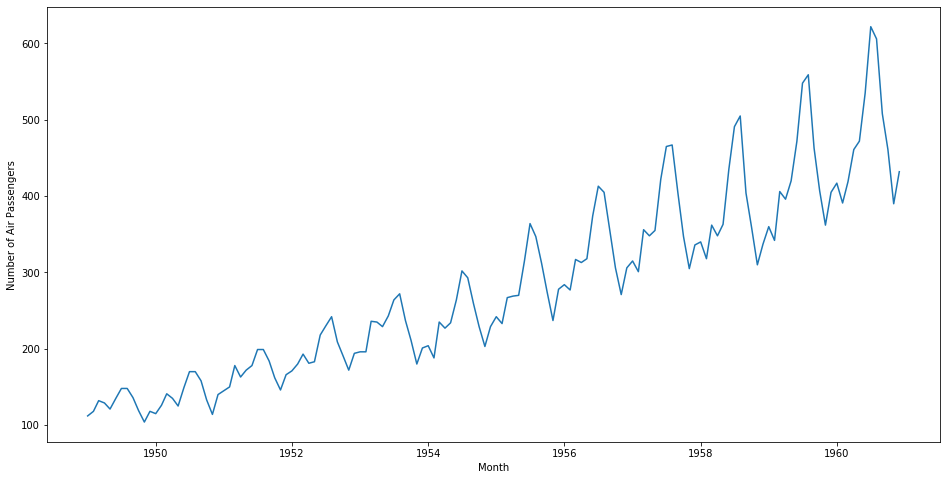

In [ ]:
# Visualizing the time series dataset
plt.figure(figsize=(16,8))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

**Observations**
- We can see that the series has a upward trend with some seasonality
- Before modelling with AR, MA or ARMA, we need to check whether the series is stationary or not
- Let us first check the rolling mean and standard deviation of the series if we can visualize any trend or seaonality

### Calculating and Visualizing the rolling mean & standard deviation of the series (for 12 observations) to check the stationarity of the time series

In [ ]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=df.rolling(window=12).mean()    #calculate the mean here
rolstd=df.rolling(window=12).std()     #calculate the standard deviation here
print(rolmean.head(15))
print('**************************************')
print('**************************************')
print(rolstd.head(15))

            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
**************************************
**************************************
            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01     13.720147
1950-01-01     13.453342
1950-02-01     13.166475
1950-03-01     13.686977


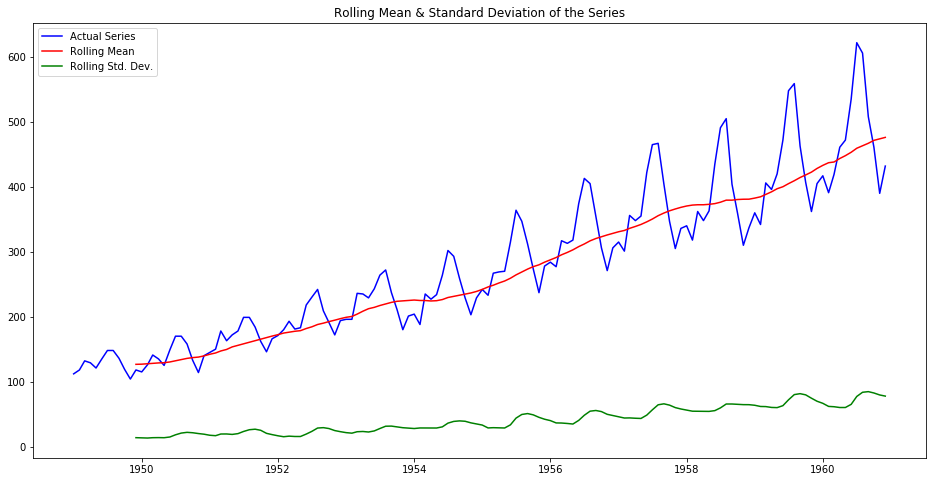

In [ ]:
#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(df, color='blue', label='Actual Series')     #fill the dataframe name
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean')    #fill the dataframe name 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')   #fill the dataframe name
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

**Observations:**

We can see there is an upward trend in the series.
The series does not look stationary.

### Testing the stationarity of the series using Augmented Dickey-Fuller Test

The hypotheses for ADF test are defined as 
-        Null hypothesis         - Time Series is non-stationary
-        Alternative hypothesis  - Time Series is stationary

In [ ]:
#Define a function to use adfuller test
def adfuller(df):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df['# Passengers'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


**Observations**
1. From the above test, we see that the p-value = 0.991880 i.e. > 0.1 (For 90% confidence intervals) therefore, we fail to reject the null hypothesis.
2. Hence, we can confirm that the series is non-stationary

### Making the series stationary

We can use the following methods to make a non-stationary series to stationary.
1. Log transformation
2. Differencing
3. By shifting the series (lagged series)

Let's first use the log transfromation over this series to remove exponential variance and again check the stationarity of the series

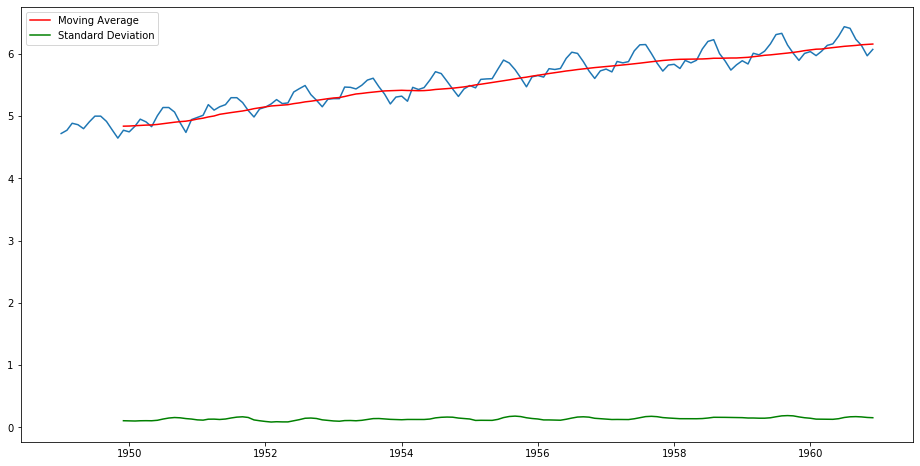

In [ ]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df)
MAvg = df_log.rolling(window=12).mean()   #calculate the mean
MStd = df_log.rolling(window=12).std()   #calculate the standard deviation
plt.plot(df_log)                            #plot the dataframe with log transformation
plt.plot(MAvg, color='r', label = 'Moving Average')   #plot the moving average of the dataframe with log transformation
plt.plot(MStd, color='g', label = 'Standard Deviation')   #plot the standard deviation of the dataframe with log transformation
plt.legend()
plt.show()

**Observations:**

Since, we can still see the upward trend in the series, we can conclude that the series is non-stationary.

Let's use differencing method over the series to remove temporal dependence (trend) and again check the stationarity of the series

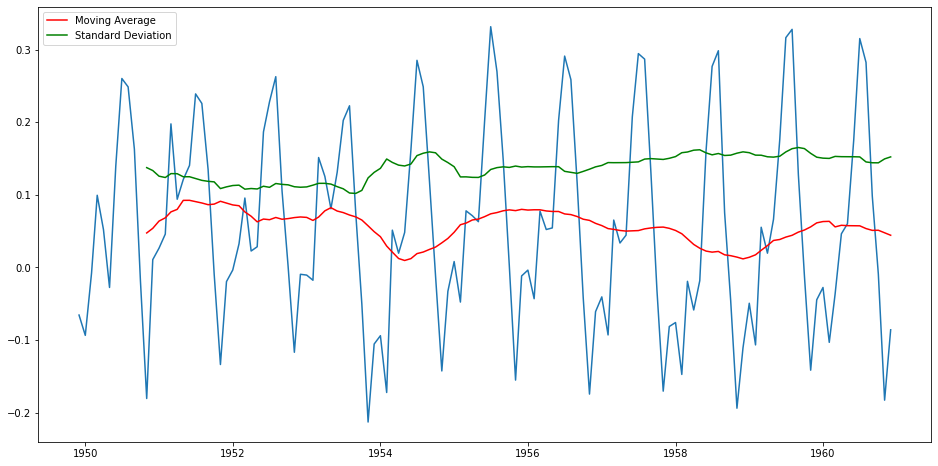

In [ ]:
# Visualize the rolling mean and standard deviation after using log transform and differencing 
plt.figure(figsize=(16,8))
df_log_diff = df_log - MAvg
MAvg_diff = df_log_diff.rolling(window=12).mean()    #calculate the mean
MStd_diff = df_log_diff.rolling(window=12).std()    #calculate the standard deviation
plt.plot(df_log_diff)                                     #plot the dataframe with differencing
plt.plot(MAvg_diff, color='r', label = 'Moving Average')  #plot the moving average of the dataframe with differencing
plt.plot(MStd_diff, color='g', label = 'Standard Deviation') #plot the standard deviation of the dataframe with differencing
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_log_diff = df_log_diff.dropna()

**Observations:**
The mean and the standard deviation seem to be constant over time.

In [ ]:
#Using the adfuller function for df_log_diff
adfuller(df_log_diff)

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


**Observations:**

We can see that the p-value = 0.02 i.e < 0.05 (for 95% confidence interval), therefore we can reject the null hypothesis that the series is non-stationary
We can conclude the series is now stationary

Let's shift the series by order 1 (or by 1 month) & apply differencing (using lagged series) and then check the rolling mean and standard deviation

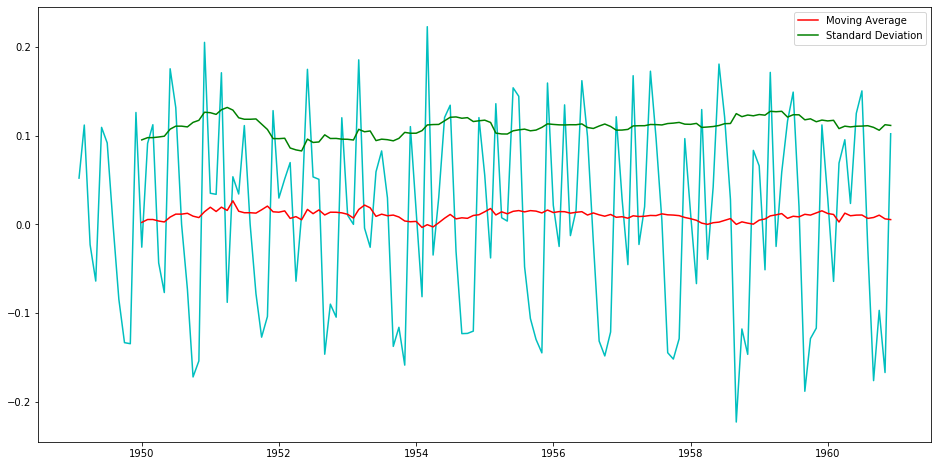

In [ ]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()   #calculate the mean
MStd_shift = df_shift.rolling(window=12).std()   #calculate the standard deviation
plt.plot(df_shift, color='c')                       #plot the dataframe with lag
plt.plot(MAvg_shift, color='red', label = 'Moving Average')    #plot the moving average of the dataframe with lag
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')    #plot the standard deviation of the dataframe with lag
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_shift = df_shift.dropna()

**Observations:**

In [ ]:
#Using the adfuller function for df_shift
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Observations     128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


**Observations:**

**Note:** *We will use the lag 1 series (df_shift) for AR, MA & ARMA models.*

### Decomposing the time series components into Trend, Seasonality and Residual

Let us decompose the time series to separate the components of the time series

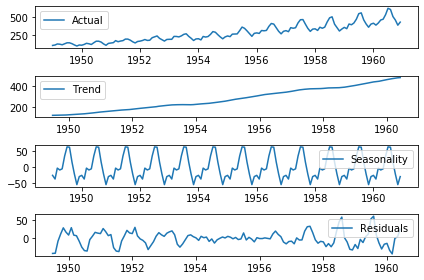

In [ ]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df)      #Use the actual series to decompose

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df, label='Actual')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()

**Observations:**

We can see there are significant trend, seasonality and residuals components in the series

### Plotting the auto-correlation function and partial auto-correlation function to get p and q value for AR, MA and ARMA models

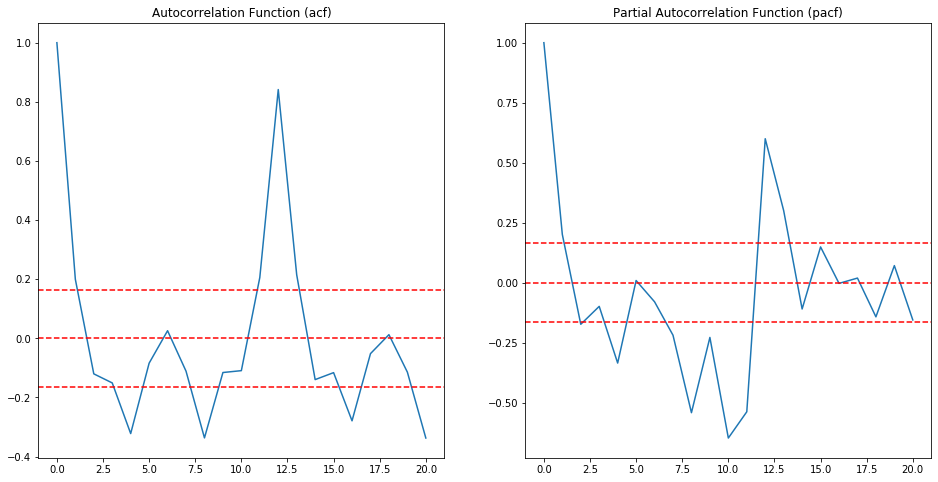

In [ ]:
#Importing acf and pacf functions
from statsmodels.tsa.stattools import acf, pacf
#Using 20 lags in the series
lag_acf = acf(df_shift, nlags=20)
lag_pacf = pacf(df_shift, nlags=20, method='ols')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.title('Autocorrelation Function (acf)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.title('Partial Autocorrelation Function (pacf)')
plt.show()

**Observations**
- We can see that in both plots, the blue line is entering into the confidence interval (dotted red) at 2, therefore we will be using the values of p, q values as 2

### AR Model

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


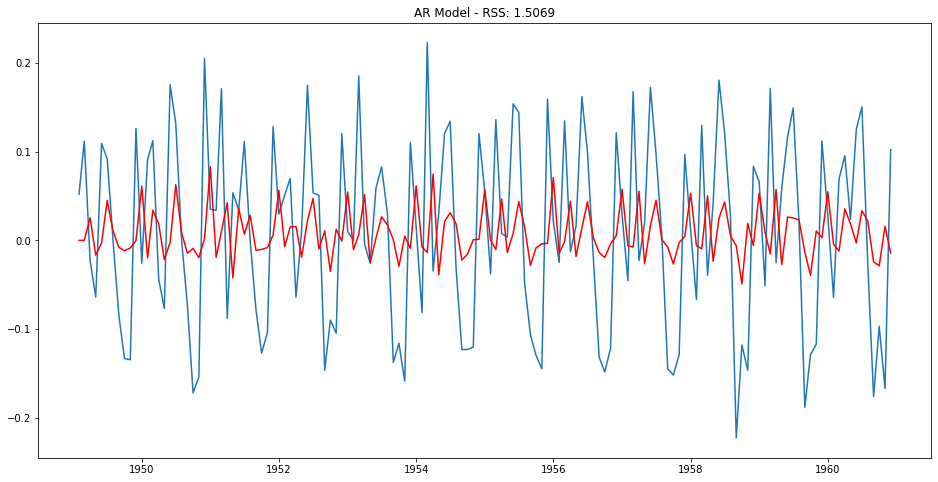

In [ ]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=2) #Using number of lags as 2
results_AR = model_AR.fit()
plt.plot(df_shift)   #Visualizing the actual series used for modelling
predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RSS: %.4f'% sum((predict-df_shift['# Passengers'])**2))   #calculate the residual sum of squares
plt.show()

**Observations**
- We can see that by using AR model, we get RSS = 1.5069
- Let us use MA and ARMA models and see if we can reduce the RSS

### MA Model

We will be using ARMA model with p=0 so that it will work as MA Model

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


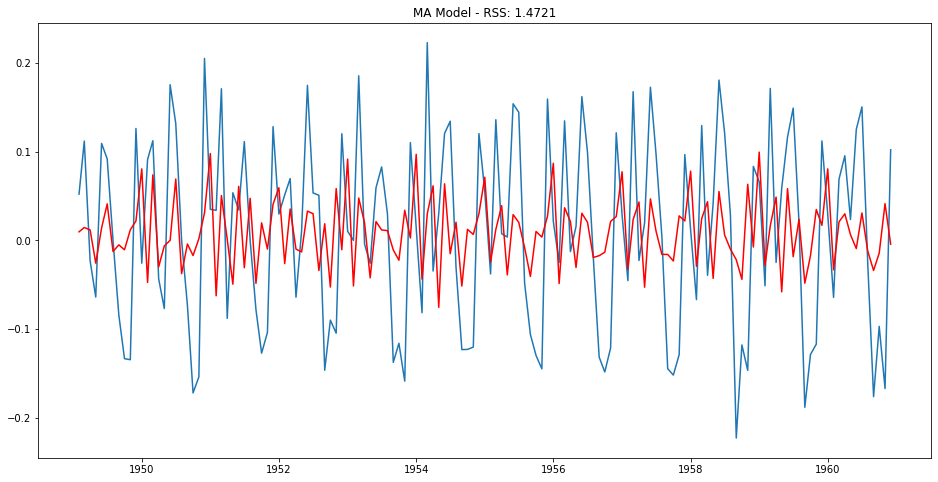

In [ ]:
#Importing ARMA
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by MA model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model_MA = ARMA(df_shift, order=(0,2)) #Using p=0 and q=2
results_MA = model_MA.fit()
plt.plot(df_shift)              #Visualzing the actual series used for modelling
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RSS: %.4f'% sum((results_MA.fittedvalues-df_shift['# Passengers'])**2))    #calculate the residual sum of squares
plt.show()

**Observations**
- We can see that by using MA model, we get RSS = 1.4721 i.e. lesser than AR model
- Let us use ARMA model and see if we can reduce the RSS

### ARMA Model


We will using p=2 and q=2 as inferred from acf and pacf

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


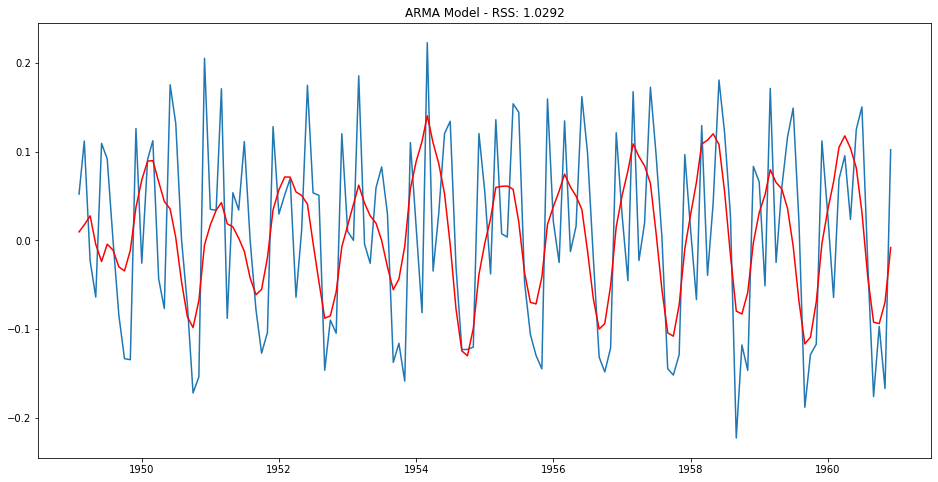

In [ ]:
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model = ARMA(df_shift, order=(2,2)) #Using p=2, q=2
results = model.fit()
plt.plot(df_shift)            #Visualizing the actual series used for modelling
plt.plot(results.fittedvalues, color='red')
plt.title('ARMA Model - RSS: %.4f'% sum((results.fittedvalues-df_shift['# Passengers'])**2))   #calculate the residual sum of squares
plt.show()  

In [ ]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           # Passengers   No. Observations:                  143
Model:                     ARMA(2, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Sun, 29 Nov 2020   AIC                           -287.281
Time:                        21:15:59   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.# Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.# Passengers  

In [ ]:
#Printing the fitted values
predictions=pd.Series(results.fittedvalues)
predictions.head()

Year-Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005227
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002662
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074


**Observations:**
- We can see that by using ARMA model, we get RSS = 1.0292 i.e lesser than both AR and MA models
- Since ARMA model gives us the best RSS, we will forecast the values using ARMA

### Inverse Transformation

Since we now have the fitted values by ARMA model, we will use the inverse transformation to get the original values.

In [ ]:
#First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()    #Use the predicted values series
predictions_cumsum.head()

Year-Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115297
1951-03-01    0.157858
1951-04-01    0.176606
1951-05-01    0.191865
1951-06-01    0.194355
1951-07-01    0.181947
                ...   
1958-07-01    1.166557
1958-08-01    1.150092
1958-09-01    1.070250
1958-10-01    0.987107
1958-11-01    0.928238
1958-12-01    0.925575
1959-01-01    0.956774
1959-02-01    1.008219
1959-03-01    1.088026
1959-04-01    1.153360
1959-05-01    1.211550
1959-06-01    1.247624


In [ ]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['# Passengers'].iloc[0], index=df_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)   #Use the series with cumulative sum
predictions_log.head()

Year-Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
1949-11-01    4.653831
1949-12-01    4.691043
1950-01-01    4.759178
1950-02-01    4.848612
1950-03-01    4.938641
1950-04-01    5.004793
1950-05-01    5.048846
1950-06-01    5.084314
1950-07-01    5.087414
1950-08-01    5.040286
1950-09-01    4.953934
1950-10-01    4.855469
1950-11-01    4.787622
1950-12-01    4.782395
1951-01-01    4.799780
1951-02-01    4.833795
1951-03-01    4.876357
1951-04-01    4.895104
1951-05-01    4.910364
1951-06-01    4.912854
                ...   
1958-07-01    5.885056
1958-08-01    5.868591
1958-09-01    5.788749
1958-10-01    5.705606
1958-11-01    5.646736
1958-12-01    5.644074
1959-01-01    5.675273
1959-02-01    5.726718
1959-03-01    5.806525
1959-04-01    5.871859
1959-05-01    5.930049
1959-06-01    5.966123


In [ ]:
#Third step - applying exponential transformation
predictions_ARMA = np.exp(predictions_log)       #Use the series with log values
predictions_ARMA.head()

Year-Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
1949-06-01    114.988276
1949-07-01    114.489523
1949-08-01    113.239579
1949-09-01    109.900656
1949-10-01    106.177215
1949-11-01    104.986420
1949-12-01    108.966791
1950-01-01    116.650007
1950-02-01    127.563223
1950-03-01    139.580483
1950-04-01    149.126229
1950-05-01    155.842593
1950-06-01    161.469070
1950-07-01    161.970427
1950-08-01    154.514263
1950-09-01    141.731384
1950-10-01    128.440853
1950-11-01    120.015672
1950-12-01    119.389936
1951-01-01    121.483663
1951-02-01    125.687098
1951-03-01    131.151977
1951-04-01    133.633962
1951-05-01    135.688842
1951-06-01    136.027018
                 ...    
1958-07-01    359.622965
1958-08-01    353.750043
1958-09-01    326.604178
1958-10-01    300.547512
1958-11-01    283.365165
1958-12-01    282.611711
1959-01-01    291.567897
1959-02-01    306.960197
1959-03-01    

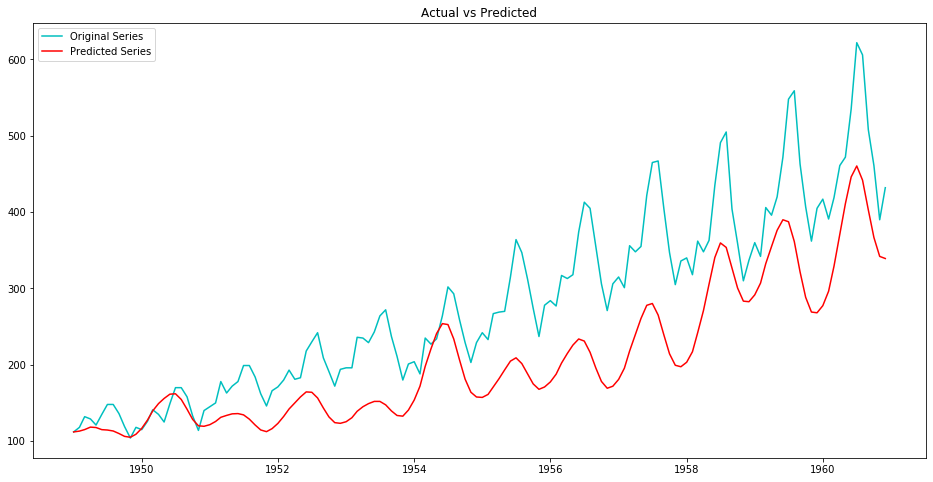

In [ ]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df, color = 'c', label = 'Original Series')
plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')       #Use the series with predicted values
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

**Observations**
- We can see that the predicted series is very similar to that of original series
- Let us forecast the number of passengers for next 24 months

### Forecasting the number of passengers for next 24 months

In order to forecast the values for next 24 months, we need to follow the below steps-
1. Forecast the fitted values for next 24 months
2. Make a combined list containing the previous fitted values by ARMA model (1949-1960 and these 24 months (1961-1962) forecasted values
3. Convert that combined list into a series so that we can work with pandas functions 
4. Make a dataframe where we have the dates starting from 01-01-1949 to 12-01-1962 as the index and the respective predicted cumulative sum values
5. Add the log values of the original series in the same dataframe from 1949-1960 and 1961-1962 as NaN (since we don't know the original number of passengers for this period)
6. Applying the inverse tranformation and get the forecasted number of passengers

In [ ]:
#Forecasting the values for next 24 months
predictions_ARMA = results.forecast(steps=24) # here steps represent the number of months
predictions_ARMA[0]

array([ 0.02710838,  0.05728015,  0.07161565,  0.06798135,  0.04923613,
        0.02194642, -0.00574679, -0.02645383, -0.03541764, -0.03149825,
       -0.01709386,  0.00286848,  0.02250666,  0.03664476,  0.0421118 ,
        0.03837161,  0.02738724,  0.01283671, -0.00104365, -0.010642  ,
       -0.01386333, -0.01052538, -0.00220531,  0.00836422])

In [ ]:
#Converting the fitted values by ARMA into a list
predictions_list = predictions.tolist()
#Converting the forecasted values by ARMA into a list
predictions_ARMA_list = predictions_ARMA[0].tolist()
#combining the both lists
predictions_list.extend(predictions_ARMA_list)
predictions_list.head()

[0.009580057409676615,
 0.017491385232795684,
 0.027670249827096587,
 -0.004520886362815897,
 -0.02388950142364682,
 -0.004346856395747167,
 -0.010977575666412023,
 -0.029928910710108718,
 -0.034467295641343265,
 -0.011278527923092196,
 0.0372121565210968,
 0.06813489656118037,
 0.08943404425798872,
 0.0900292697350541,
 0.06615174413435815,
 0.044053360804809566,
 0.03546712257226137,
 0.0031001672240416056,
 -0.04712736068353249,
 -0.08635280619114132,
 -0.09846509567439572,
 -0.06784617202525788,
 -0.005227430247944892,
 0.01738488790685826,
 0.03401567652929975,
 0.04256130766621663,
 0.018747659645781276,
 0.015259902207786877,
 0.0024891905931715627,
 -0.012408019616205149,
 -0.04249190541829875,
 -0.06132794855491648,
 -0.05533803178028805,
 -0.019570443920010408,
 0.034555544394526405,
 0.0569753256420292,
 0.07153407910276685,
 0.07139123318006207,
 0.0547412007200775,
 0.0506619962295828,
 0.040927828751154804,
 -0.0029859720072017842,
 -0.04648268984636353,
 -0.0878964942484

In [ ]:
#Converting the combined list into a series
predictions_list_series = pd.Series(predictions_list)
predictions_list_series.head()

0      0.009580
1      0.017491
2      0.027670
3     -0.004521
4     -0.023890
5     -0.004347
6     -0.010978
7     -0.029929
8     -0.034467
9     -0.011279
10     0.037212
11     0.068135
12     0.089434
13     0.090029
14     0.066152
15     0.044053
16     0.035467
17     0.003100
18    -0.047127
19    -0.086353
20    -0.098465
21    -0.067846
22    -0.005227
23     0.017385
24     0.034016
25     0.042561
26     0.018748
27     0.015260
28     0.002489
29    -0.012408
         ...   
137    0.031718
138   -0.041176
139   -0.092350
140   -0.094013
141   -0.069924
142   -0.008127
143    0.027108
144    0.057280
145    0.071616
146    0.067981
147    0.049236
148    0.021946
149   -0.005747
150   -0.026454
151   -0.035418
152   -0.031498
153   -0.017094
154    0.002868
155    0.022507
156    0.036645
157    0.042112
158    0.038372
159    0.027387
160    0.012837
161   -0.001044
162   -0.010642
163   -0.013863
164   -0.010525
165   -0.002205
166    0.008364
Length: 167, dtype: floa

In [ ]:
forecasted_cumsum = predictions_list_series.cumsum()
forecasted_cumsum.head()

0      0.009580
1      0.027071
2      0.054742
3      0.050221
4      0.026331
5      0.021984
6      0.011007
7     -0.018922
8     -0.053389
9     -0.064668
10    -0.027456
11     0.040679
12     0.130113
13     0.220143
14     0.286294
15     0.330348
16     0.365815
17     0.368915
18     0.321788
19     0.235435
20     0.136970
21     0.069123
22     0.063896
23     0.081281
24     0.115297
25     0.157858
26     0.176606
27     0.191865
28     0.194355
29     0.181947
         ...   
137    1.413730
138    1.372554
139    1.280204
140    1.186191
141    1.116268
142    1.108141
143    1.135249
144    1.192529
145    1.264145
146    1.332126
147    1.381362
148    1.403309
149    1.397562
150    1.371108
151    1.335691
152    1.304192
153    1.287098
154    1.289967
155    1.312474
156    1.349118
157    1.391230
158    1.429602
159    1.456989
160    1.469826
161    1.468782
162    1.458140
163    1.444277
164    1.433751
165    1.431546
166    1.439910
Length: 167, dtype: floa

In [ ]:
#Making a new dataframe to get the additional dates from 1961-1962
index = pd.date_range('1949-02-01','1963-01-01' , freq='1M') - pd.offsets.MonthBegin(1)
df_final = pd.DataFrame()
df_final['Forecasted cumsum'] = forecasted_cumsum
df_final.index = index
df_final.head()

,Forecasted cumsum
1949-02-01,0.009580
1949-03-01,0.027071
1949-04-01,0.054742
1949-05-01,0.050221
1949-06-01,0.026331
1949-07-01,0.021984
1949-08-01,0.011007
1949-09-01,-0.018922
1949-10-01,-0.053389
1949-11-01,-0.064668


In [ ]:
#Joining the forecasted cum sum values to that with original log series
df_final = df_final.join(df_log, lsuffix='cumsum')
df_final.head()
#The last NaN values show the absence of the original values

,Forecasted cumsum,# Passengers
1949-02-01,0.009580,4.770685
1949-03-01,0.027071,4.882802
1949-04-01,0.054742,4.859812
1949-05-01,0.050221,4.795791
1949-06-01,0.026331,4.905275
1949-07-01,0.021984,4.997212
1949-08-01,0.011007,4.997212
1949-09-01,-0.018922,4.912655
1949-10-01,-0.053389,4.779123
1949-11-01,-0.064668,4.644391


In [ ]:
#Adding the first value to the cum sum values
forecasted_log = pd.Series(df_final['# Passengers'].iloc[0], index = df_final.index)
forecasted_log = forecasted_log.add(df_final['Forecasted cumsum'])
forecasted_log.head()

1949-02-01    4.780265
1949-03-01    4.797756
1949-04-01    4.825426
1949-05-01    4.820905
1949-06-01    4.797016
1949-07-01    4.792669
1949-08-01    4.781691
1949-09-01    4.751763
1949-10-01    4.717295
1949-11-01    4.706017
1949-12-01    4.743229
1950-01-01    4.811364
1950-02-01    4.900798
1950-03-01    4.990827
1950-04-01    5.056979
1950-05-01    5.101032
1950-06-01    5.136499
1950-07-01    5.139600
1950-08-01    5.092472
1950-09-01    5.006119
1950-10-01    4.907654
1950-11-01    4.839808
1950-12-01    4.834581
1951-01-01    4.851966
1951-02-01    4.885981
1951-03-01    4.928543
1951-04-01    4.947290
1951-05-01    4.962550
1951-06-01    4.965039
1951-07-01    4.952631
                ...   
1960-07-01    6.184415
1960-08-01    6.143239
1960-09-01    6.050889
1960-10-01    5.956876
1960-11-01    5.886952
1960-12-01    5.878825
1961-01-01    5.905934
1961-02-01    5.963214
1961-03-01    6.034829
1961-04-01    6.102811
1961-05-01    6.152047
1961-06-01    6.173993
1961-07-01 

In [ ]:
#Applying exponential transformation to the forecasted log values
forecasted_ARMA = np.exp(forecasted_log)
forecasted_ARMA.head()

1949-02-01    119.135879
1949-03-01    121.238062
1949-04-01    124.639593
1949-05-01    124.077383
1949-06-01    121.148362
1949-07-01    120.622891
1949-08-01    119.305985
1949-09-01    115.788191
1949-10-01    111.865280
1949-11-01    110.610693
1949-12-01    114.804298
1950-01-01    122.899115
1950-02-01    134.396967
1950-03-01    147.058009
1950-04-01    157.115134
1950-05-01    164.191304
1950-06-01    170.119198
1950-07-01    170.647415
1950-08-01    162.791813
1950-09-01    149.324137
1950-10-01    135.321613
1950-11-01    126.445083
1950-12-01    125.785825
1951-01-01    127.991717
1951-02-01    132.420336
1951-03-01    138.177976
1951-04-01    140.792925
1951-05-01    142.957887
1951-06-01    143.314180
1951-07-01    141.546922
                 ...    
1960-07-01    485.129002
1960-08-01    465.558998
1960-09-01    424.490211
1960-10-01    386.401051
1960-11-01    360.305453
1960-12-01    357.389170
1961-01-01    367.209923
1961-02-01    388.857840
1961-03-01    417.727571


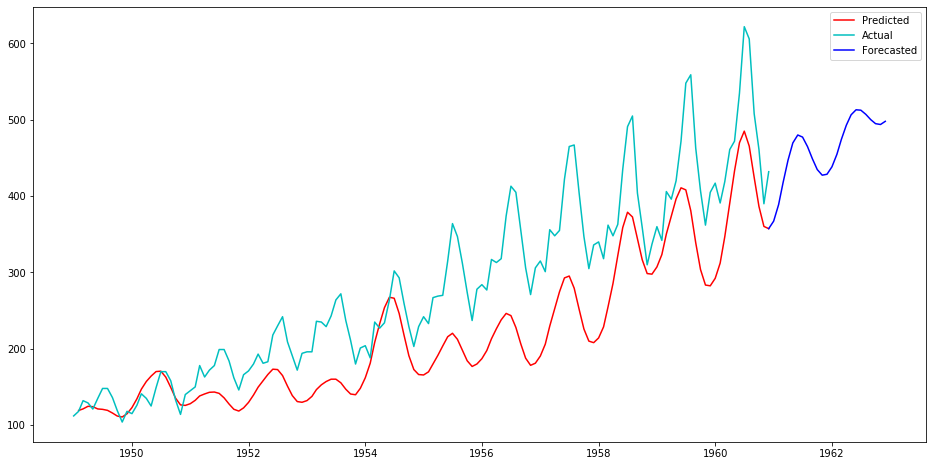

In [ ]:
#Visualizing the forecasted values
plt.figure(figsize=(16,8))
plt.plot(forecasted_ARMA.loc['1949-02-01':'1960-12-01'], label = 'Predicted', color = 'r')   #use the forecasted values till 1960-12-01
plt.plot(df['# Passengers'], label = 'Actual', color = 'c')
plt.plot(forecasted_ARMA.loc['1960-12-01':'1962-12-01'], color = 'b', label = 'Forecasted')   #use the forecasted values from 1961-01-01 to 1962-12-01
plt.legend()
plt.show()

**Observations:**

It can be determined from the graph that the forecasted values till 1960-12-01(predicted) are in line with the actual value. Actual va;ues are not on the range with forecasted values from 1961-01-01 to 1962-12-01(forecasted).